# LSTM (Long Short-Term Memory)

Gli elementi principali di questo modello sono:

- la capacità di *didmenticare* (**forget**);
- la capacità di *salvare* (**save**);
- la capacità di *mettere a fuoco* (**focus**) gli aspetti più rilevanti della memoria.

Il modello LSTM ha due layer nascosti ad ogni istante di tempo t:

- $s_t$, *state vector*, cioè la memoria di lavoro;
- $c_t$, *cell state*, cioè la memoria a lungo termine.

Questi due vettori di stato hanno la stessa lunghezza.

L'architettura che abilita la capacità di *forget*, *save* e *focus* è il **gate**.
Un gate **g** è un vettore della stessa lunghezza dello *state vecor* **s**; ogni elemento del gate è compreso tra 0 e 1.
Il prodotto di Hadamard $s \circ g$ permette di selezionare solo alcuni elementi del vettore di stato da passare.
Solitamente il *gate* è creato da una combinazione lineare dello stato nascosto con l'input corrente.
In generale, un LSTM può usare differenti tipi di gate, ognuno per uno scopo differente. Al tempo t, possiamo creare un gate **g** come segue:
<center>$g = \sigma(W * s_{t-1} + U * x_t + b)$</center>
W e U sono matrici peso e b il vettore di bias. 

Al tempo t, possiamo calcolare un candidato come un vettore di aggiornamento dello stato $h_t$ basato sul precedente stato nascosto e dall'input corrente:
<center>$h_t = \tanh(W_h * s_{t-1} + U_h * x_t + b_h$</center>


Inoltre si calcolano due gate:

- il forget gate $f_t$, che determina quali aspetti della memoria a lungo termine bisogna rtrattenere;
- l'input gate $i_t$, che determina quali parti di $h_t$ bisogna salvare nella memoria a lungo termine.

<center>$f_t = \sigma(W_f * s_{t-1} + U_f * x_t + b_f$</center>
<center>$i_t = \sigma(W_i * s_{t-1} + U_i * x_t + b_i$</center>

A questo puhnto possiamo aggiornare la memoria a lungo termine nel seguente modo:
<center>$c_t = c_{t-1} \circ f_t + h_t \circ i_t$</center>

A questo punto bisogna aggiornate la memoria corrente, possiamo farlo in due passi:

1. creare un output gate;
2. applicare l'output gate alla memoria a lungo termine usanto la funzione di attivazione tanh.

<center>$o_t = \sigma(W * o_{t-1} + U_o * x_t + b_o$</center>
<center>$s_t = \tanh(c_t \circ o_t)$</center>

L'output al tempo t è dato dalla seguente espressione:
<center>$y_t = g(V * s_t + d)$</center>

dove *g* è una funzione di attivazione, *V* una matrice dei pesi e *d* il vettore di bias.

Alcuni esempi:<br>
<a href="https://github.com/jaungiers/LSTM-Neural-Network-for-Time-Series-Prediction" target="_blank">https://github.com/jaungiers/LSTM-Neural-Network-for-Time-Series-Prediction</a><br>
<a href="https://github.com/guillaume-chevalier/LSTM-Human-Activity-Recognition" target="_blank">https://github.com/guillaume-chevalier/LSTM-Human-Activity-Recognition</a><br>
<a href="https://github.com/hichenway/stock_predict_with_LSTM" target="_blank">https://github.com/hichenway/stock_predict_with_LSTM</a><br>
<a href="https://keras.io/examples/timeseries/timeseries_weather_forecasting/" target="_blank">https://keras.io/examples/timeseries/timeseries_weather_forecasting/</a><br>

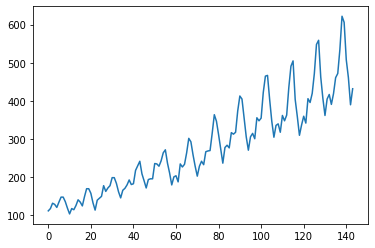

In [2]:
import pandas
import matplotlib.pyplot as plt
dataset = pandas.read_csv('airline-passengers.csv', usecols=[1], engine='python')
plt.plot(dataset)
plt.show()

Possiamo definire il problema come un problema di regressione.

Cioè, dato il numero di passeggeri (in unità di migliaia) questo mese, qual è il numero di passeggeri il mese prossimo?

Possiamo scrivere una semplice funzione per convertire la nostra singola colonna di dati in un set di dati a due colonne: la prima colonna contenente il conteggio dei passeggeri di questo mese (t) e la seconda colonna contenente il conteggio dei passeggeri del mese successivo (t + 1), da prevedere.

In [11]:
import numpy
import matplotlib.pyplot as plt
import pandas
import math
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [12]:
# fix random seed for reproducibility
numpy.random.seed(7)

In [13]:
# load the dataset
dataframe = pandas.read_csv('airline-passengers.csv', usecols=[1], engine='python')
dataset = dataframe.values
dataset = dataset.astype('float32')

In [14]:
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

In [15]:
# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print(len(train), len(test))

96 48


In [16]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [18]:
# reshape into X=t and Y=t+1
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [19]:
# reshape input to be [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [20]:
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)

Epoch 1/100
94/94 - 7s - loss: 0.0502
Epoch 2/100
94/94 - 0s - loss: 0.0244
Epoch 3/100
94/94 - 0s - loss: 0.0182
Epoch 4/100
94/94 - 0s - loss: 0.0166
Epoch 5/100
94/94 - 0s - loss: 0.0155
Epoch 6/100
94/94 - 0s - loss: 0.0145
Epoch 7/100
94/94 - 0s - loss: 0.0134
Epoch 8/100
94/94 - 0s - loss: 0.0124
Epoch 9/100
94/94 - 0s - loss: 0.0114
Epoch 10/100
94/94 - 0s - loss: 0.0107
Epoch 11/100
94/94 - 0s - loss: 0.0096
Epoch 12/100
94/94 - 0s - loss: 0.0086
Epoch 13/100
94/94 - 0s - loss: 0.0078
Epoch 14/100
94/94 - 0s - loss: 0.0070
Epoch 15/100
94/94 - 0s - loss: 0.0062
Epoch 16/100
94/94 - 0s - loss: 0.0055
Epoch 17/100
94/94 - 0s - loss: 0.0048
Epoch 18/100
94/94 - 0s - loss: 0.0042
Epoch 19/100
94/94 - 0s - loss: 0.0038
Epoch 20/100
94/94 - 0s - loss: 0.0033
Epoch 21/100
94/94 - 0s - loss: 0.0030
Epoch 22/100
94/94 - 0s - loss: 0.0027
Epoch 23/100
94/94 - 0s - loss: 0.0025
Epoch 24/100
94/94 - 0s - loss: 0.0024
Epoch 25/100
94/94 - 0s - loss: 0.0023
Epoch 26/100
94/94 - 0s - loss: 0.

In [21]:
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 22.91 RMSE
Test Score: 49.29 RMSE


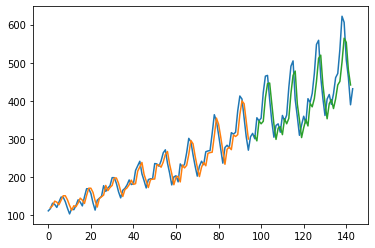

In [22]:
# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()